## TODO:
- 设计复用接口（interface）
    - `bash` interface? `python` interface?
- 一些ROI选取依赖于手动，如何智能自动选取？
- `Makefile` 制作
- 命名归一化
- 有必要面向对象吗？

# 数据描述

`ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00001.nii.gz`: 很怪

`ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00005.nii.gz`: 3个断层，冠状面


[Ref of dipy in IVIM](https://docs.dipy.org/stable/examples_built/reconstruction/reconst_ivim.html#sphx-glr-examples-built-reconstruction-reconst-ivim-py)

$$ S(b) = S_0 (f e^{-bD^*} + (1-f)e^{-bD}) $$

In [1]:
import os
import numpy as np
import nibabel as nib
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

import ivim_analysis.gen_mask
from math import pi

Welcome to ivim_analysis version 1.0.0


In [2]:
# name依托于path
# screen_602_nii_name = '__WATER__BH_Ax_LAVA-FlexMASK_20230527154152_4.nii.gz'

nii_name = 'ST0_A01-AB+MRCP+CE-Q_20240120092423_11.nii.gz'

# unprocess path
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/nii_tmp_2/PA1'

example_filename = os.path.join(zhaog_path, nii_name)
# aslice_comm_filename = os.path.join(zhaog_path, screen_602_nii_name)

img = nib.load(example_filename)
# screen_img = nib.load(aslice_comm_filename).get_fdata()

img_get = nib.load(example_filename).get_filename
# TODO: /S_0
img_get_fdata = img.get_fdata()
# %ls ../unprocess/nii/zhaoguang/ |grep 

0
5673.0
1.0
696819
529.0
0.0


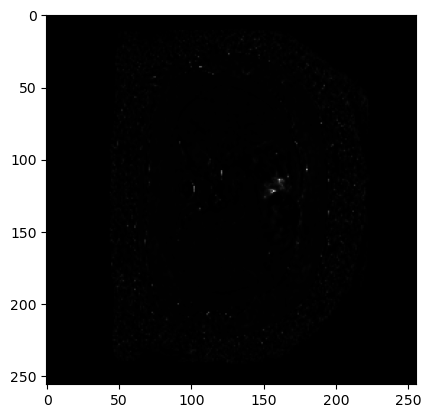

In [3]:
img_get_fdata.dtype

# a vol of b_0 
avol_ = img_get_fdata[:,:, :,-1].copy()
avol_[avol_==0] = 1
print(np.count_nonzero(avol_ == 0))
print(avol_.max())
print(avol_.min())

# /S_0
tmp = img_get_fdata[:,:, :, 1] / avol_
print(np.count_nonzero(tmp == 0))
print(tmp.max())
print(tmp.min())

plt.imshow(tmp[:,:,12], 'gray')
# plt.imshow(avol_origin_b0[:,:,12], 'gray')

In [4]:
%ls /data/users/cyang/acute_pancreatitis/unprocess/nii/pantient2/

Readme.md
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00001.json
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00001.nii.gz
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00004.json
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00004.nii.gz
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00005.json
ST0_3-Pl_Loc_SSFSE_20231120173431_1_i00005.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_1100.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_1100.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_1200.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_1200.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_500.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_500.nii.gz
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_601.json
ST0_Apparent_Diffusion_Coefficient_(mm2_s)_20231120173431_601.nii.gz
ST0_COL_RTr_Cor_fs_3D_MRCP_20231120173431_800.json
ST0_COL_RTr_Cor_fs_3D_MRCP_20231120173431_800.nii.gz
ST0_Exponential_Apparent_Diffusion_Coefficie

In [5]:
img.shape

(256, 256, 24, 10)

In [6]:
img_get()

'/data/users/cyang/acute_pancreatitis/unprocess/nii_tmp_2/PA1/ST0_A01-AB+MRCP+CE-Q_20240120092423_11.nii.gz'

In [7]:
header_img = img.header
header_img.get_xyzt_units()

('mm', 'sec')

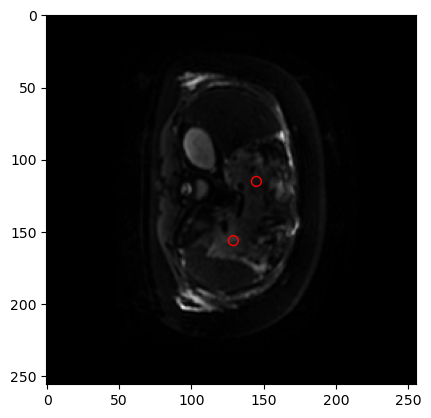

In [8]:
pancreas_slice = 9  # a slice to show pancreas
plt.imshow(img_get_fdata[:,:,pancreas_slice,1],'gray')

# ROI parameters
x_roi, y_roi = 129, 156
x_roi_head, y_roi_head = 145, 115
rad = 4  # radius of circle ROI

def plt_circle_roi(x_roi, y_roi, radius=5):
    plt.scatter(x_roi,y_roi,marker='o',s=radius**2*pi,facecolors='None',edgecolors='r')  # circle ROI
    

plt_circle_roi(x_roi,y_roi,rad)
plt_circle_roi(x_roi_head,y_roi_head,rad)

True

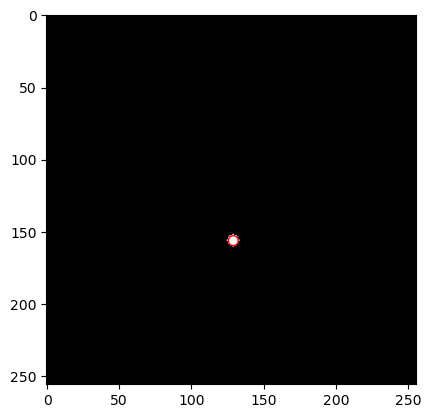

In [9]:
i_h, i_w = img_get_fdata.shape[0],img_get_fdata.shape[1]


mask_roi = ivim_analysis.gen_mask.generate_mask(i_h, i_w, rad, x_roi, y_roi)

plt.imshow(mask_roi, 'gray')
# plt.imshow(img_get_fdata[:,:,pancreas_slice,1],'gray')
plt_circle_roi(x_roi, y_roi, rad)

mask_roi.shape == img_get_fdata[:,:,pancreas_slice,1].shape

In [10]:
mask_roi
# print(np.count_nonzero(mask_roi))
((np.ones((i_h,i_w))*2)*mask_roi).sum()
# mask_roi.sum()

98.0

(array([[ 3., 15.,  6.,  0.,  2.,  0.,  1.,  1.,  0.,  2.],
        [ 3., 15., 10.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 5., 11.,  1.,  6.,  7.,  0.,  0.,  0.,  0.,  0.],
        [ 5.,  9.,  2.,  0.,  6.,  5.,  3.,  0.,  0.,  0.],
        [ 8.,  5.,  2.,  1.,  2.,  6.,  3.,  3.,  0.,  0.],
        [12.,  1.,  2.,  0.,  1.,  8.,  3.,  2.,  1.,  0.],
        [11.,  1.,  3.,  0.,  2.,  7.,  5.,  0.,  0.,  1.],
        [10.,  4.,  1.,  2.,  2.,  8.,  1.,  1.,  0.,  1.],
        [ 9.,  5.,  2.,  2.,  2.,  5.,  3.,  1.,  0.,  1.],
        [ 9.,  6.,  3.,  2.,  3.,  3.,  2.,  1.,  1.,  0.],
        [11.,  6.,  2.,  4.,  3.,  1.,  1.,  0.,  2.,  0.],
        [12.,  8.,  2.,  5.,  0.,  1.,  0.,  1.,  1.,  0.],
        [16.,  7.,  4.,  0.,  1.,  0.,  1.,  1.,  0.,  0.],
        [21.,  6.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
        [28.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  2.,  0.,  0.,  0.,  0.,  

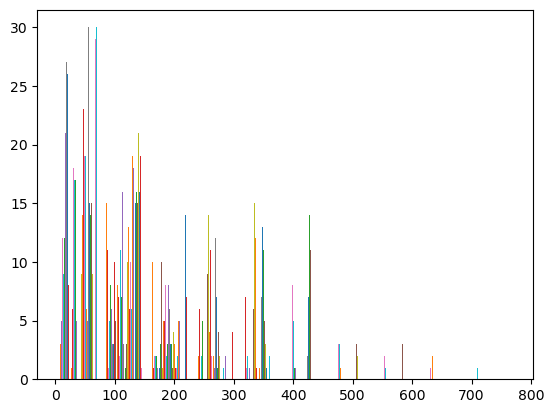

In [11]:
plt.hist(img_get_fdata[100:130,100:200,1,1])

Interactive to determine ROI

In [12]:
%matplotlib inline

def plot_img_nii(i_slice, i_bval,x_roi,y_roi, rad):
    plt.imshow(img_get_fdata[:,:,i_slice,i_bval],'gray')
#     plt.scatter(x_roi, y_roi)
    plt_circle_roi(x_roi, y_roi, rad)
    
    
interactive(plot_img_nii, 
            i_slice = (0,img_get_fdata.shape[2]-1),
            i_bval = (0,img_get_fdata.shape[3]-1),
            x_roi =(0,img_get_fdata.shape[0]-1),
            y_roi=(0,img_get_fdata.shape[1]-1),
            rad=(0,10))

interactive(children=(IntSlider(value=11, description='i_slice', max=23), IntSlider(value=4, description='i_bv…

In [13]:
num_bval = img_get_fdata.shape[3]
intensive_of_10b = np.zeros(num_bval)
for i_bval in range(img_get_fdata.shape[3]):
    print(i_bval)
    intensive_of_10b[i_bval] = img_get_fdata[116,186,15,i_bval]

0
1
2
3
4
5
6
7
8
9


(256, 256, 10)

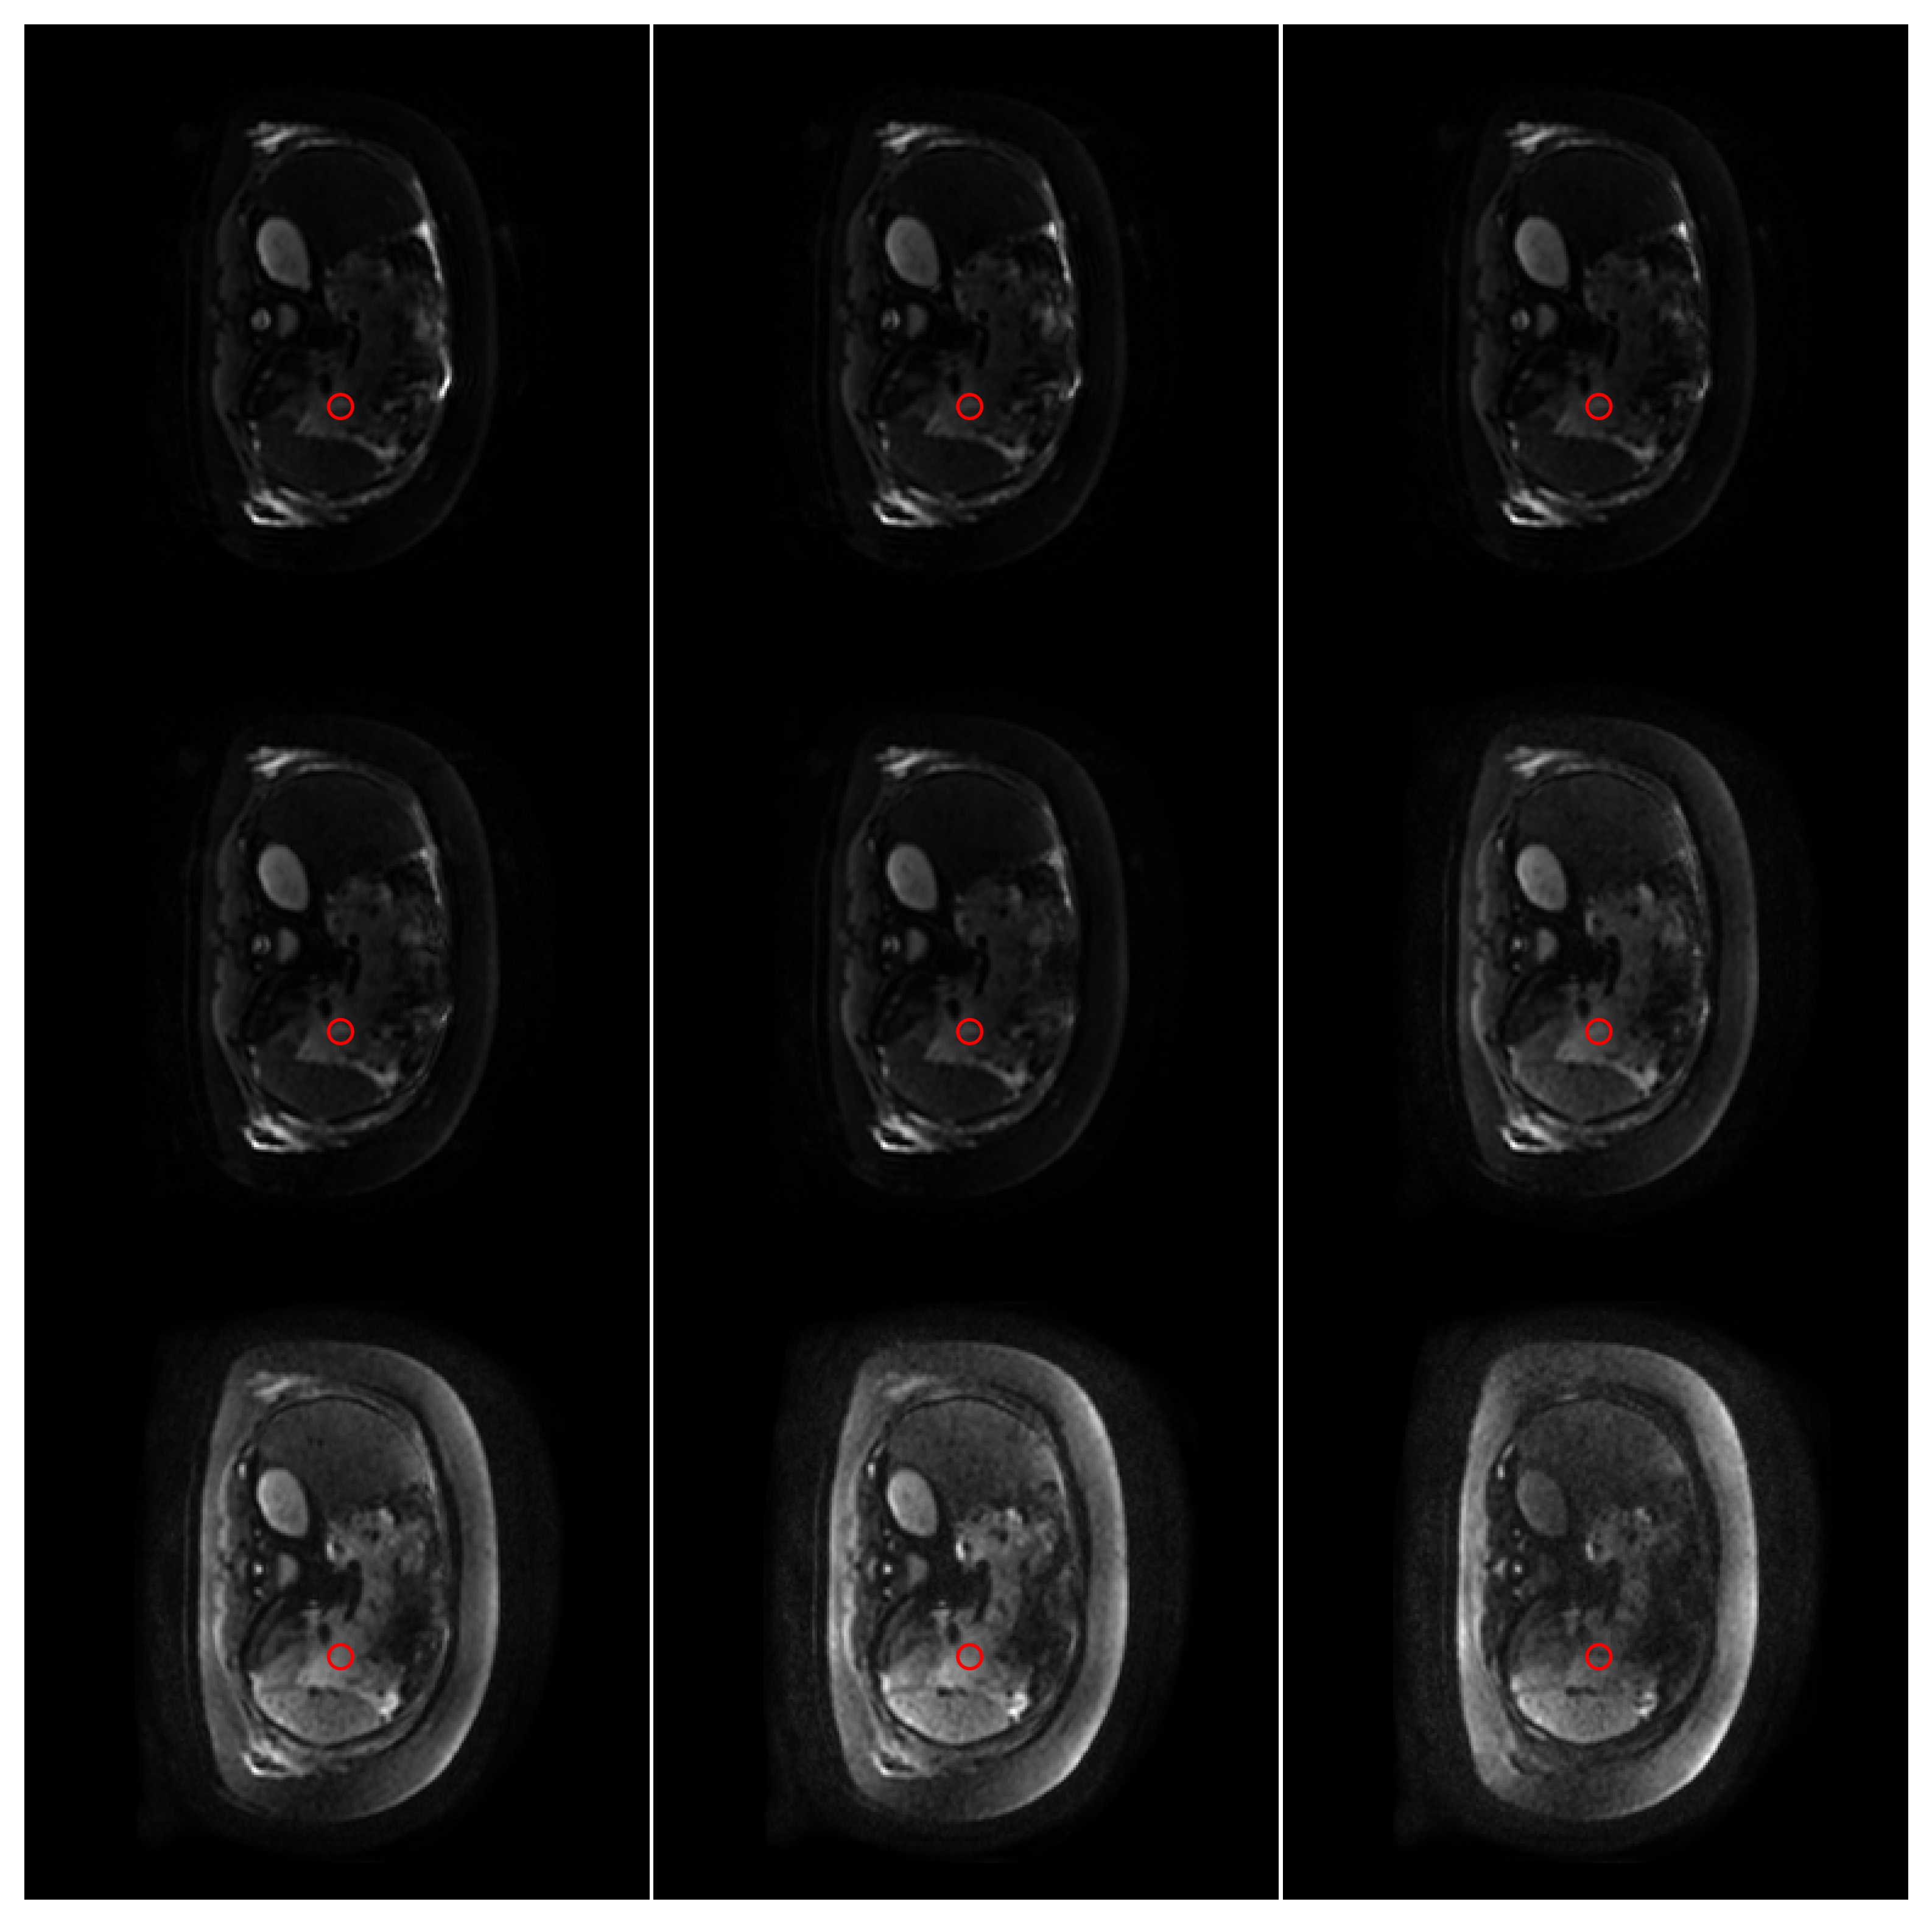

In [14]:
# from matplotlib import colormaps
import matplotlib as mpl

fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', dpi=400, figsize=(10,10))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)


def plot_img_nii_sub(i_slice, i_bval,x_roi,y_roi, ax, radius):
    ax.axis('off')
    
    ax.imshow(img_get_fdata[:,:,i_slice,i_bval],'gray')
    ax.scatter(x_roi, y_roi, marker='o', s=radius**2*pi, edgecolors='r', facecolors='None')
    
    
# x_roi, y_roi = 100, 100
ax = np.ravel(ax)
for i_b in range(num_bval-1):
    plot_img_nii_sub(pancreas_slice, i_b, x_roi, y_roi, ax[i_b], rad)
    plt.savefig('b_9.png')
    
# fig.fig
pancreas_9_b_array = img_get_fdata[:,:,15,:]
pancreas_9_b_array.shape

In [15]:
# help(ax[0].scatter)
# help('matplotlib')

(4000, 4000, 3)

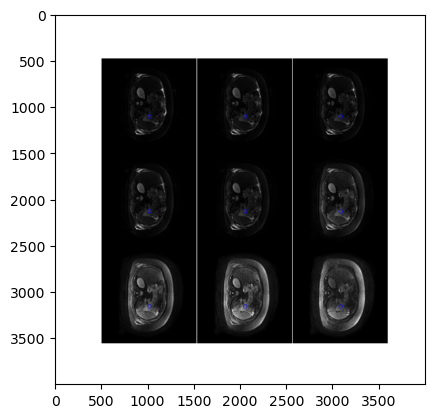

In [16]:
import cv2
b_9_png = cv2.imread('b_9.png')

plt.imshow(b_9_png)
b_9_png.shape


10


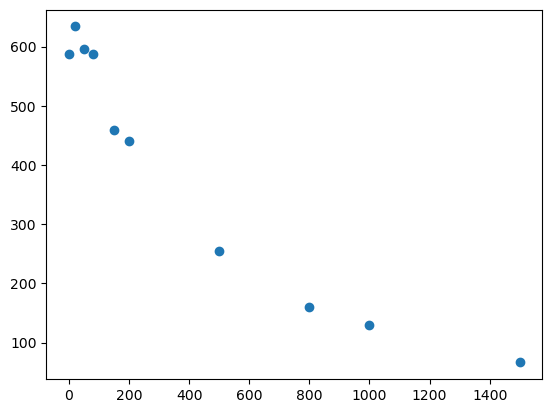

In [17]:
num_bval = img_get_fdata.shape[3]
print(num_bval)
intensive_of_10b = np.zeros(num_bval)

for i_bval in range(num_bval):
    # print(i_bval)
    # TODO: 改成圆形
    intense_roi = np.sum(img_get_fdata[:,:,pancreas_slice,i_bval]*mask_roi)/mask_roi.sum()
    # 方形的ROI
#     intense_roi = np.sum(img_get_fdata[x_roi-5:x_roi+5,y_roi-5:y_roi+5,pancreas_slice,i_bval])/10
    # print(intense_roi.shape)
#     print(i_bval-9)
    intensive_of_10b[i_bval-9] = intense_roi
    
plt.scatter([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500],intensive_of_10b)

In [18]:
from dipy.reconst.ivim import IvimModel
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti_data

In [19]:
fraw, fbval, fbvec = get_fnames('ivim')


In [20]:
# data = load_nifti_data(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
# gtab = gradient_table(bvals, bvecs, b0_threshold=0)
# print('data.shape (%d, %d, %d, %d)' % data.shape)

In [21]:
ap_bvals = np.array([20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

data.shape (256, 256, 24, 10)


In [22]:
# TODO: analysis 这里计算时间较长的原因
ivimmodel = IvimModel(gtab, fit_method='trr')

data_slice = img_get_fdata[:,:,pancreas_slice,:]
# data_slice = np.append(img_get_fdata[:,:,-1,:], img_get_fdata[:,:,0:15,:])
ivimfit = ivimmodel.fit(data_slice)

/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:153: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|                                                                                                                                                                                                                                                                          | 0/65536 [00:00<?, ?it/s]/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:383: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals >=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:378: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals <=
/home/cyang/.conda/envs/pt/lib/python3.10/site-packages/dipy/reconst/ivim.py:436: UserW

In [23]:
# nib.save(ivimfit, 'tmp')
# from dipy.
# help(IvimModel)

In [24]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

ivimparams.shape : (256, 256, 4)


In [25]:
i, j = x_roi, y_roi
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

[2.89095886e+02 4.69294173e-01 2.67544711e-03 1.12985863e-03]


In [26]:
# list all poisition of where value is true
estimated_params_roi = []

shape_ivim_params = ivimfit.model_params.shape

for i in range(shape_ivim_params[2]):
    estimated_params_roi.append(np.sum(np.nan_to_num(ivimfit.model_params[:,:,i])*mask_roi)/mask_roi.sum())


np.array(estimated_params_roi)

array([6.37887343e+02, 2.42306086e-01, 2.10433712e-03, 1.36394133e-03])

In [27]:
from math import pi

In [28]:
from ivim_analysis.gen_mask import plot_map_roi, plot_map

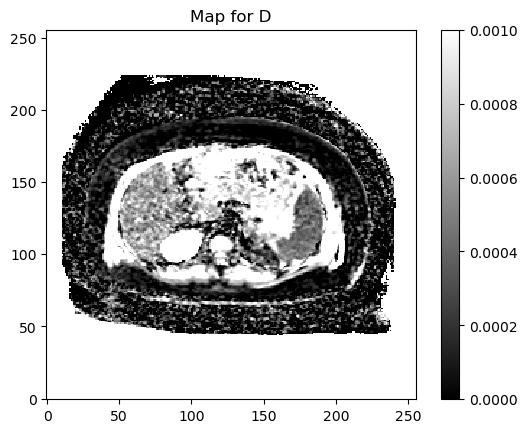

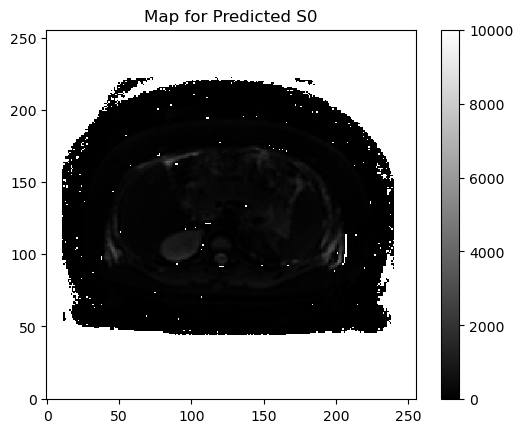

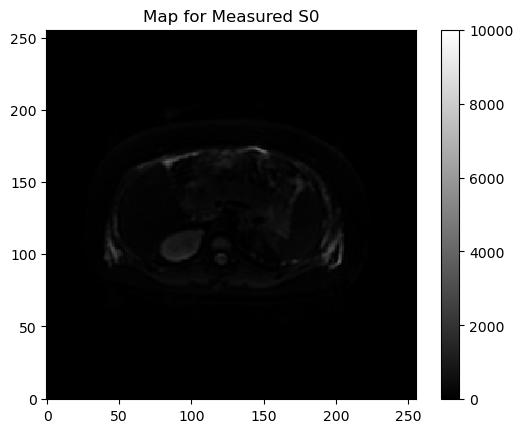

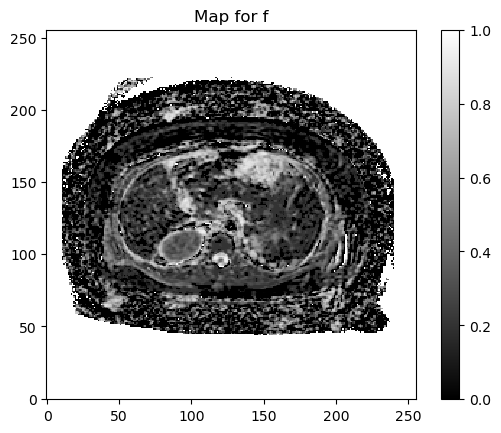

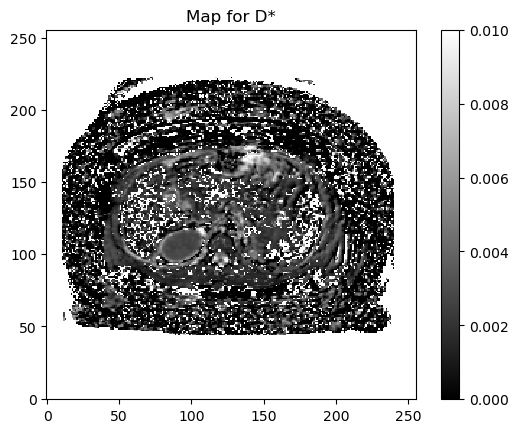

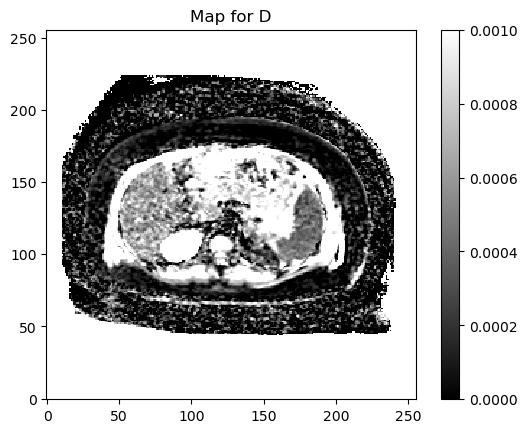

In [29]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")

NameError: name 'pi' is not defined

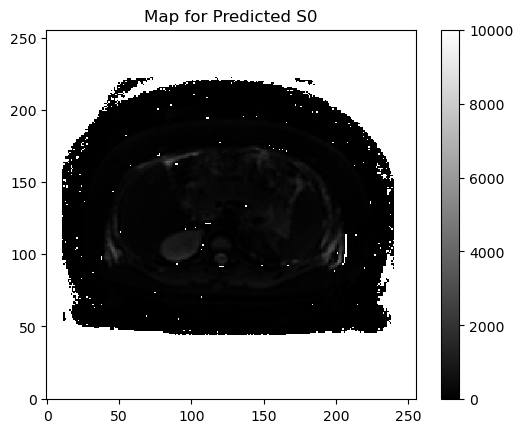

In [31]:
plot_map_roi(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0",x_roi, y_roi)
plot_map_roi(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0",x_roi, y_roi)
plot_map_roi(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction",x_roi, y_roi)
plot_map_roi(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff",x_roi, y_roi)
plot_map_roi(ivimfit.D, "D", (0, 0.001), "diffusion_coeff",x_roi, y_roi)

In [ ]:
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro', bounds=([0., 0., 0.,0.], [np.inf, 1., 1., 1.]))
ivimmodel_vp = IvimModel(gtab, fit_method='VarPro')
ivimfit_vp = ivimmodel_vp.fit(data_slice)

In [ ]:
i, j = 116,186
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

In [ ]:
fig, ax = plt.subplots(1)

ax.scatter(gtab.bvals, data_slice[i, j, :],
           color="green", label="Measured signal")

ivim_trr_predict = ivimfit.predict(gtab)[i, j, :]

ax.plot(np.append(0,gtab.bvals[:-1]), np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1]), label="trr prediction")


S0_est, f_est, D_star_est, D_est = ivimfit.model_params[i, j, :]

text_fit = """trr param estimates: \n S0={:06.3f} f={:06.4f}\n
            D*={:06.5f} D={:06.5f}""".format(S0_est, f_est, D_star_est, D_est)

ax.text(0.65, 0.80, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

ax.set_xlabel("bvalues")
ax.set_ylabel("Signals")


fig.legend(loc='upper right')
fig.savefig("ivim_voxel_plot.png")

In [ ]:
np.append(0,gtab.bvals[:-1])
np.append(ivim_trr_predict[-1],ivim_trr_predict[:-1])

In [ ]:
data_slice = img_get_fdata[75:200,75:175,15,:]
data_slice_order = np.array(data_slice)

num_bval = img_get_fdata.shape[3]
for i_bval in range(img_get_fdata.shape[3]):
    data_slice_order[:,:,i_bval-9] = data_slice[:,:,i_bval]

def plot_img_nii(i_bval,x_roi,y_roi):
    plt.imshow(data_slice_order[:,:,i_bval],'gray')
    plt.colorbar()
    plt.scatter(x_roi, y_roi)
    
    
interactive(plot_img_nii, 
            i_bval = (0,data_slice_order.shape[2]-1),
            x_roi =(0,data_slice_order.shape[1]-1),
            y_roi=(0,data_slice_order.shape[0]-1))

In [ ]:
ap_bvals = np.array([0, 20, 50, 80, 150, 200, 500, 800, 1000, 1500])
ap_bvecs = bvecs[0:10,:]
gtab = gradient_table(ap_bvals,ap_bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % img_get_fdata.shape)

In [ ]:
ivimmodel = IvimModel(gtab, fit_method='trr')
ivimfit = ivimmodel.fit(data_slice_order)

In [ ]:
ivimparams = ivimfit.model_params 
print("ivimparams.shape : {}".format(ivimparams.shape))

In [ ]:
i, j = 112, 42
estimated_params = ivimfit.model_params[i, j, :]
print(estimated_params)

In [ ]:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="gray", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

In [ ]:
plot_map(ivimfit.S0_predicted, "Predicted S0", (0, 10000), "predicted_S0.png")
plot_map(data_slice[:, :, 0], "Measured S0", (0, 10000), "measured_S0.png")
plot_map(ivimfit.perfusion_fraction, "f", (0, 1), "perfusion_fraction.png")
plot_map(ivimfit.D_star, "D*", (0, 0.01), "perfusion_coeff.png")
plot_map(ivimfit.D, "D", (0, 0.001), "diffusion_coeff.png")